In [66]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../src')
from utils import display_info, display_summary_stats, display_unique_values, display_value_counts, plot_histogram, plot_boxplot


# Analyse Sales
## Negative sales

Did you notice? Yes we noticed. 138 records are having a negative unit sales.
And analyse this subset, nothing strange --> conclude its retour.

In [24]:
df = pd.read_csv('../data/processed/sales_clean.csv')
negative_sales_df = df[df['unit_sales'] < 0]
print(f"There are {len(negative_sales_df)} negative sales.")
print(negative_sales_df.columns)

There are 138 negative sales.
Index(['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion'], dtype='object')


In [17]:
display_info(negative_sales_df)

DataFrame Info:
------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 6638 to 2054906
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         138 non-null    object 
 1   store_nbr    138 non-null    int64  
 2   item_nbr     138 non-null    int64  
 3   unit_sales   138 non-null    float64
 4   onpromotion  138 non-null    bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 5.5+ KB
None


DataFrame Shape:
------------------------------
(138, 5)


Missing Values:
------------------------------
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
dtype: int64




In [19]:
display_unique_values(negative_sales_df)

Unique values in date: ['2013-01-11' '2013-03-04' '2013-03-05' '2013-03-30' '2013-04-19'
 '2013-05-15' '2013-06-05' '2013-07-25' '2013-08-02' '2013-08-20'
 '2013-08-27' '2013-08-29' '2013-10-04' '2013-10-14' '2013-11-06'
 '2013-11-15' '2013-11-23' '2013-12-05' '2013-12-26' '2014-01-05'
 '2014-01-23' '2014-01-28' '2014-02-21' '2014-04-07' '2014-04-24'
 '2014-06-27' '2014-07-07' '2014-08-22' '2014-08-25' '2014-09-15'
 '2014-10-06' '2014-10-16' '2014-10-17' '2014-10-18' '2014-10-27'
 '2014-11-27' '2015-01-10' '2015-01-23' '2015-02-06' '2015-02-24'
 '2015-03-12' '2015-03-31' '2015-04-04' '2015-04-23' '2015-06-01'
 '2015-06-08' '2015-06-09' '2015-07-15' '2015-07-17' '2015-08-10'
 '2015-08-15' '2015-09-01' '2015-09-16' '2015-09-25' '2015-10-04'
 '2015-10-15' '2015-10-29' '2015-11-20' '2015-11-21' '2015-12-03'
 '2015-12-13' '2015-12-18' '2015-12-22' '2015-12-24' '2016-01-04'
 '2016-01-22' '2016-01-23' '2016-01-30' '2016-02-27' '2016-03-04'
 '2016-03-05' '2016-03-06' '2016-03-15' '2016-04-06' 

In [20]:
display_value_counts(negative_sales_df)

Value counts for date:
date
2017-02-09    3
2016-04-06    2
2017-02-12    2
2017-03-06    2
2015-09-16    2
             ..
2015-02-06    1
2015-01-23    1
2015-01-10    1
2014-11-27    1
2017-07-25    1
Name: count, Length: 129, dtype: int64


Value counts for store_nbr:
store_nbr
18    10
51     9
4      8
1      7
44     7
24     6
7      6
9      6
20     5
3      5
16     4
47     4
49     4
27     4
45     3
19     3
41     3
2      3
38     3
5      3
8      3
37     3
50     2
31     2
25     2
29     2
15     2
53     2
17     2
13     2
14     1
21     1
54     1
48     1
6      1
28     1
30     1
43     1
11     1
23     1
33     1
26     1
36     1
Name: count, dtype: int64


Value counts for item_nbr:
item_nbr
1229440    3
172995     3
1464239    2
2006144    2
1575235    2
          ..
929893     1
208514     1
1472489    1
572838     1
1463555    1
Name: count, Length: 129, dtype: int64


Value counts for unit_sales:
unit_sales
-1.000      73
-2.000      17
-3.000      

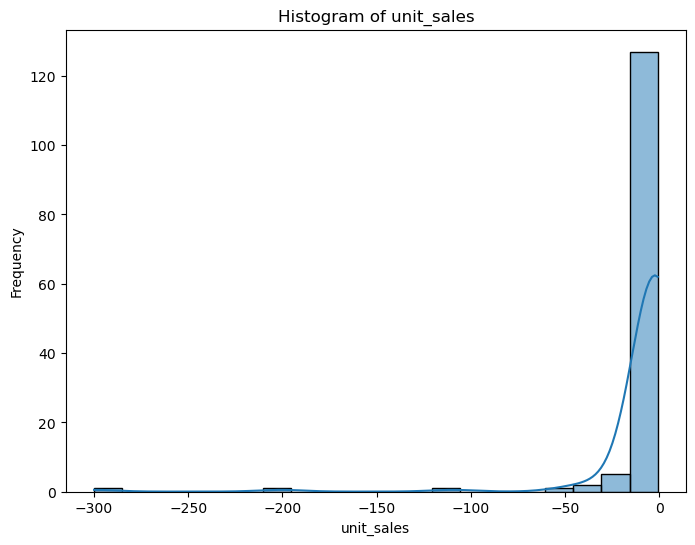

In [14]:
plot_histogram(negative_sales_df, 'unit_sales')

## Sales by store

In [42]:
def plot_groupbystore_sum(df, column, title):
    df = df.groupby('store_nbr')[column].sum()
    df = df.sort_values(ascending=False)

    print(f'top 5: {df.head()}')
    print(f'bot 5: {df.tail()}')

    plt.figure(figsize=(10, 6))
    df.plot(kind='bar')
    plt.title(title)
    plt.xlabel('store_nbr')
    plt.ylabel('Total Unit Sales')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
    plt.tight_layout()
    plt.show()

In [59]:
df = pd.read_csv('../data/processed/merged_clean.csv')

top 5: store_nbr
44    1.037717e+06
45    9.056815e+05
47    8.447371e+05
3     8.283888e+05
49    7.213815e+05
Name: unit_sales, dtype: float64
bot 5: store_nbr
35    125864.1873
30    119915.3069
32     95452.9349
22     70955.3280
52     44294.3320
Name: unit_sales, dtype: float64


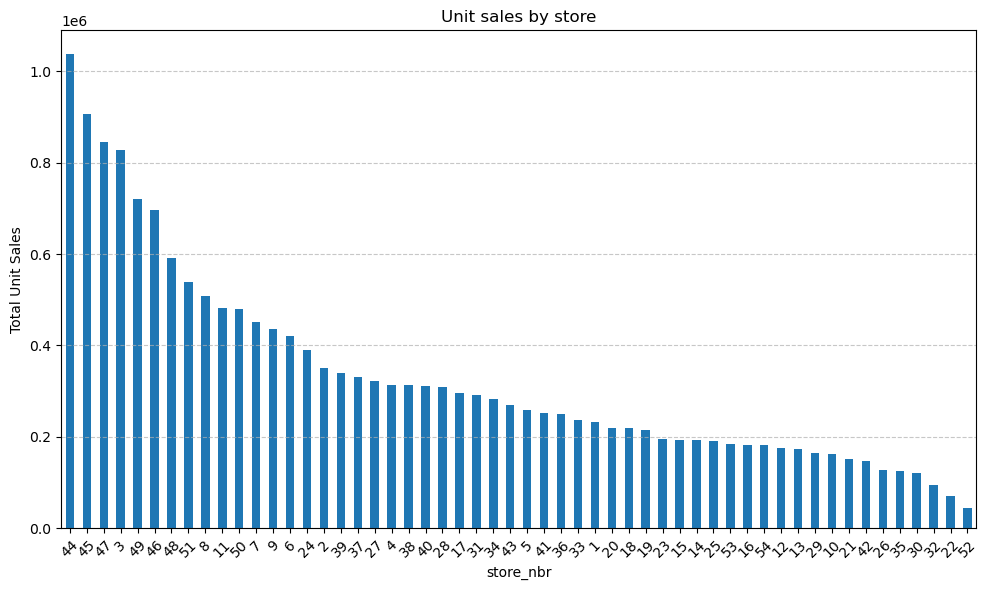

In [47]:
plot_groupbystore_sum(df, 'unit_sales', 'Unit sales by store')

top 5: store_nbr
44    7.968463e+06
45    7.008606e+06
47    6.411944e+06
3     6.304505e+06
49    5.501498e+06
Name: total_sales, dtype: float64
bot 5: store_nbr
30    948010.647691
35    946595.045011
32    762889.573865
22    580154.412582
52    336173.099387
Name: total_sales, dtype: float64


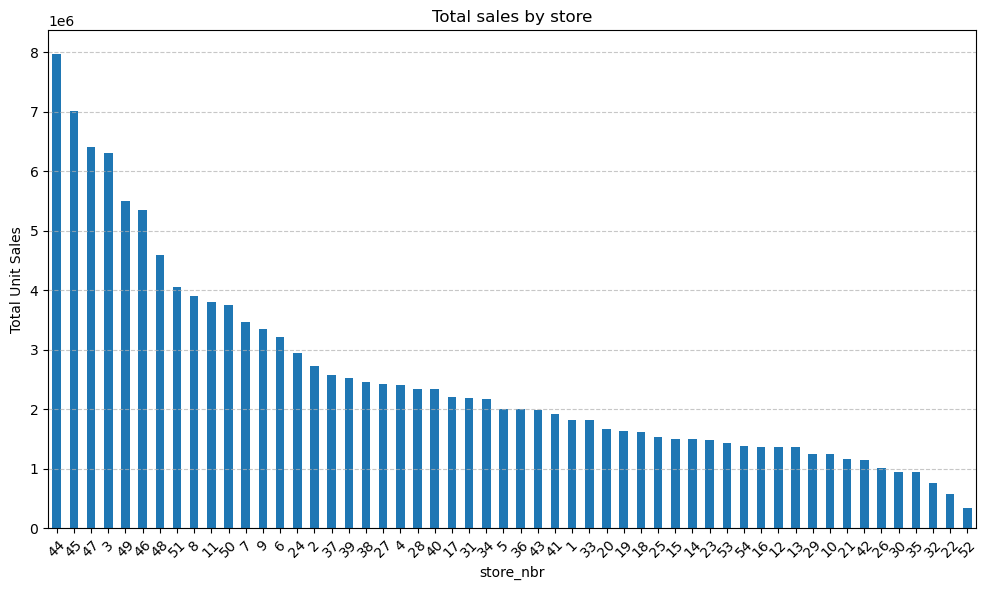

In [48]:
plot_groupbystore_sum(df, 'total_sales','Total sales by store')

## Sales by day

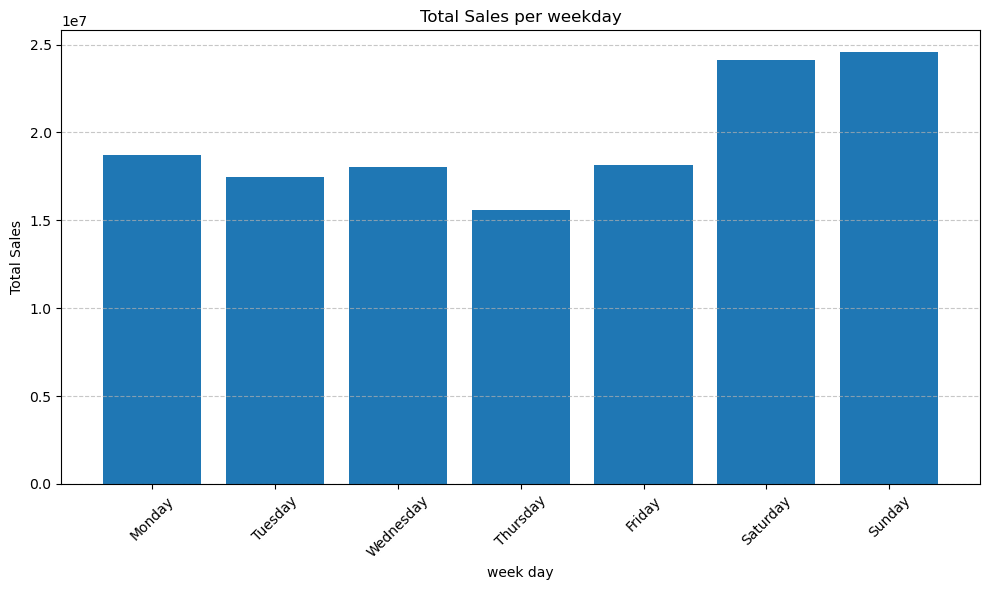

In [72]:
total_sales_per_weekday = df.groupby('weekday')['total_sales'].sum().reset_index()
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_sales_per_weekday['weekday'] = total_sales_per_weekday['weekday'].map(lambda x: weekday_names[x])

plt.figure(figsize=(10, 6))
plt.bar(total_sales_per_weekday['weekday'], total_sales_per_weekday['total_sales'])
plt.title('Total Sales per weekday')
plt.xlabel('week day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()

## Sales by holiday

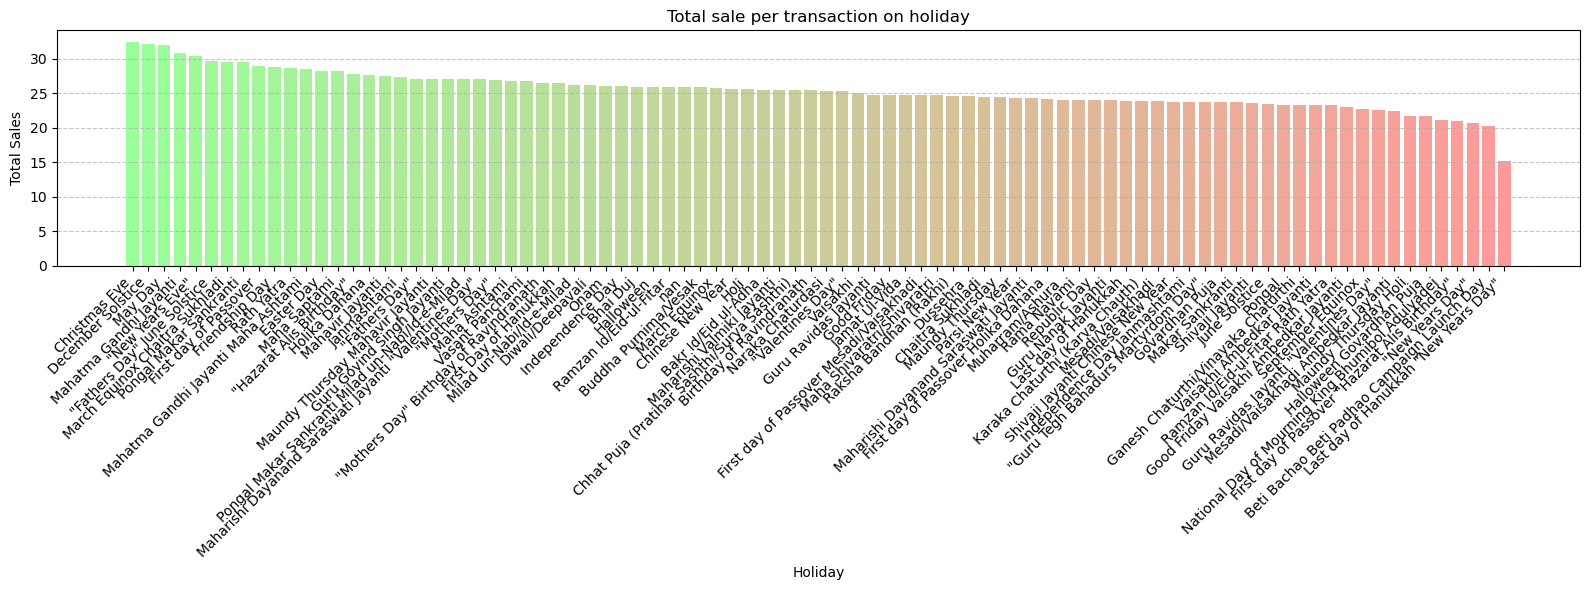

In [96]:
df = pd.read_csv('../data/processed/merged_clean.csv')
df['description_name'] = df['description'].str.replace(r'[\[\]\',]', '', regex=True)
total_sales_per_holiday = df.groupby('description_name')['total_sales'].median()
total_sales_per_holiday = total_sales_per_holiday.sort_values(ascending=False)
total_sales_per_holiday = total_sales_per_holiday.drop(total_sales_per_holiday.index[0])

num_bars = len(total_sales_per_holiday)
pastel_red = (1, 0.6, 0.6)  # RGB values for pastel red
pastel_green = (0.6, 1, 0.6)  # RGB values for pastel green
colors = np.linspace(pastel_green, pastel_red, num_bars)

# Plot the bar chart with the generated colormap
plt.figure(figsize=(16, 6))
bars = plt.bar(total_sales_per_holiday.index, total_sales_per_holiday.values, color=colors)

plt.title('Total sale per transaction on holiday')
plt.xlabel('Holiday')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()

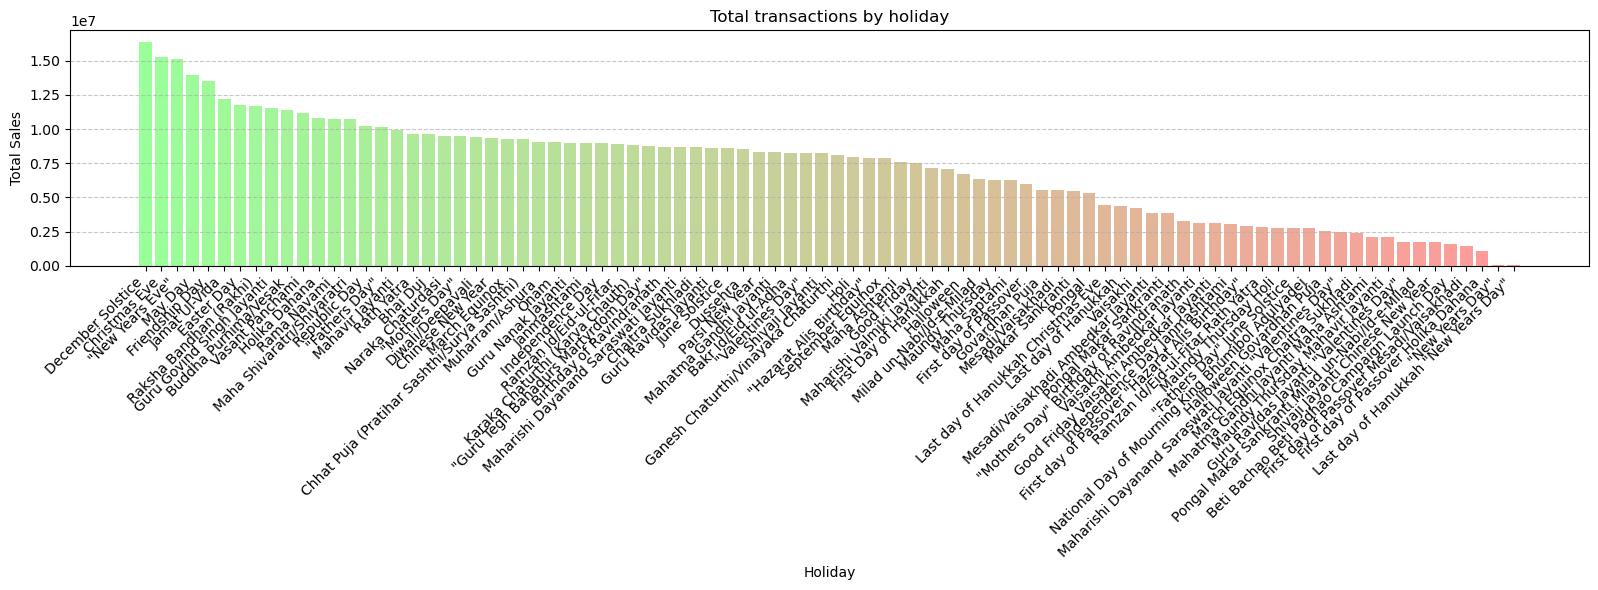

In [97]:
df = pd.read_csv('../data/processed/merged_clean.csv')
df['description_name'] = df['description'].str.replace(r'[\[\]\',]', '', regex=True)
total_sales_per_holiday = df.groupby('description_name')['transactions'].sum()
total_sales_per_holiday = total_sales_per_holiday.sort_values(ascending=False)
total_sales_per_holiday = total_sales_per_holiday.drop(total_sales_per_holiday.index[0])

num_bars = len(total_sales_per_holiday)
pastel_red = (1, 0.6, 0.6)  # RGB values for pastel red
pastel_green = (0.6, 1, 0.6)  # RGB values for pastel green
colors = np.linspace(pastel_green, pastel_red, num_bars)

# Plot the bar chart with the generated colormap
plt.figure(figsize=(16, 6))
bars = plt.bar(total_sales_per_holiday.index, total_sales_per_holiday.values, color=colors)

plt.title('Total transactions by holiday')
plt.xlabel('Holiday')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()

# Sales by oil

## Monthly

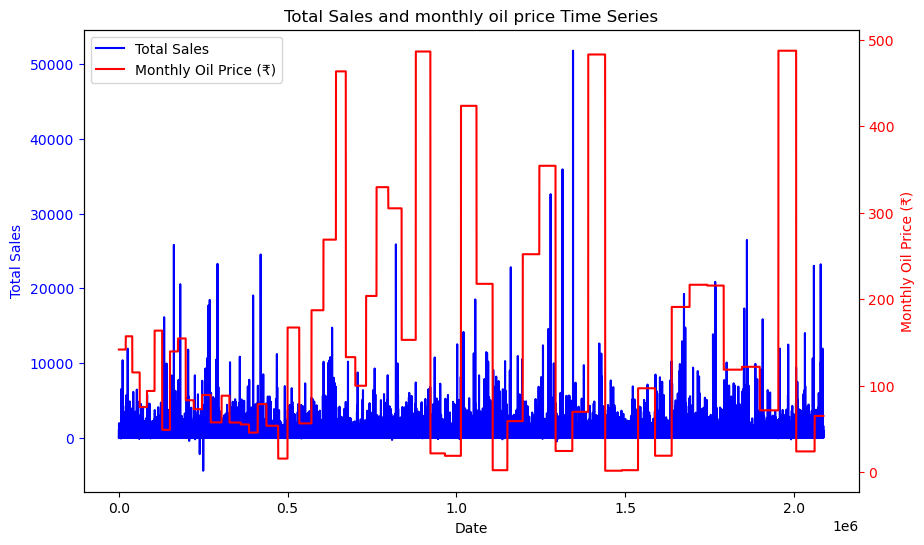

In [103]:
df = pd.read_csv('../data/processed/merged_clean.csv')

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df.index, df['total_sales'], label='Total Sales', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(df.index, df['oil_price_monthly'], label='Monthly Oil Price (₹)', color='red')
ax2.set_ylabel('Monthly Oil Price (₹)', color='red')
ax2.tick_params('y', colors='red')


lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')
plt.title('Total Sales and monthly oil price Time Series')
plt.show()

## Daily

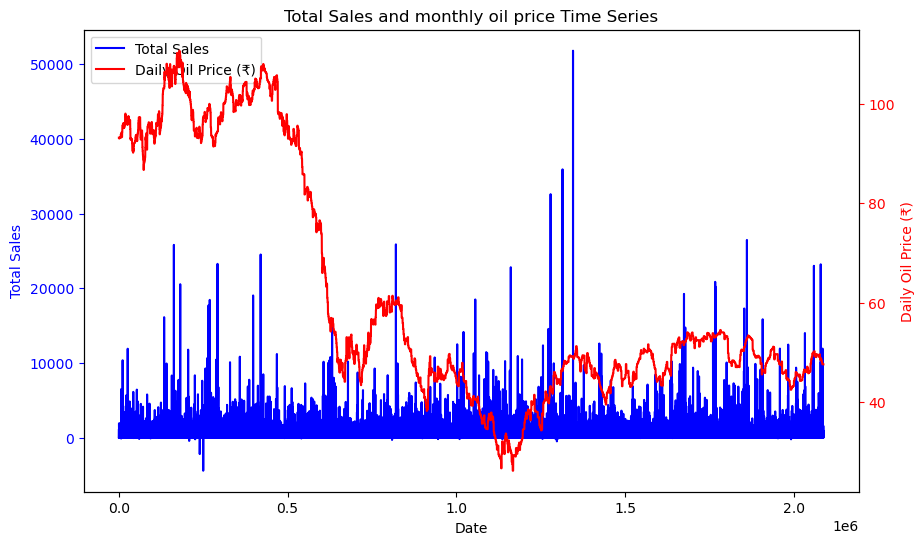

In [104]:
df = pd.read_csv('../data/processed/merged_clean.csv')

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df.index, df['total_sales'], label='Total Sales', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(df.index, df['oil_price_daily'], label='Daily Oil Price (₹)', color='red')
ax2.set_ylabel('Daily Oil Price (₹)', color='red')
ax2.tick_params('y', colors='red')


lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')
plt.title('Total Sales and monthly oil price Time Series')
plt.show()

## Correlation with oil

Correlation coefficient between total sales and monthly oil price: 0.0015831846150799781
Correlation coefficient between total sales and daily oil price: 0.011351273790557653


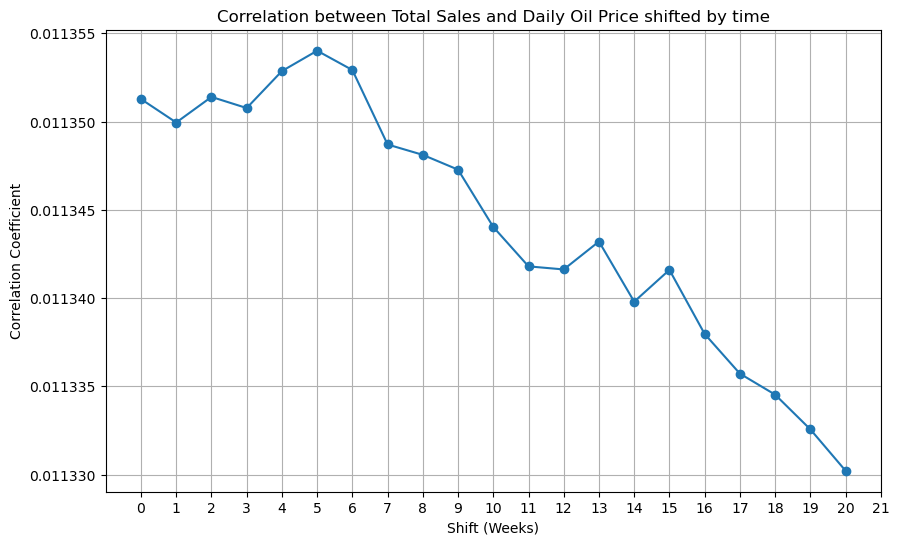

In [108]:
# Calculate the correlation coefficient
correlation = df['total_sales'].corr(df['oil_price_monthly'])
print("Correlation coefficient between total sales and monthly oil price:", correlation)

# Calculate the correlation coefficient
correlation = df['total_sales'].corr(df['oil_price_daily'])
print("Correlation coefficient between total sales and daily oil price:", correlation)

# Define the number of weeks to shift
shift_values = np.arange(0, 21)

# List to store correlation coefficients
correlation_values = []

# Loop through each shift value
for shift_value in shift_values:
    # Shift 'dcoilwtico' by the current shift value
    shifted_price = df['oil_price_daily'].shift(periods=-shift_value*7)
    
    # Calculate the correlation coefficient
    correlation_shifted = df['total_sales'].corr(shifted_price)
    
    # Append the correlation coefficient to the list
    correlation_values.append(correlation_shifted)

# Plot the correlation coefficients shifted by time
plt.figure(figsize=(10, 6))
plt.plot(shift_values, correlation_values, marker='o')
plt.xlabel('Shift (Weeks)')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation between Total Sales and Daily Oil Price shifted by time')
plt.grid(True)
plt.xticks(np.arange(0, 22, 1))
plt.show()
